<div style="color:#fdd017;text-align:center;font-weight:bolder;font-size:1.5em;background-color: black;">

# 2. Limpieza / EDA

</div>

<div style="color:#fdd017;">

## 2.1 Comprobación de balanceo del Target

Es conveniente medir el balance de la variable objetivo, ya que si la proporción de clientes que causan baja es mucho menor que la de los que permanecen, los modelos tenderán a “ignorar” la señal minoritaria y podrían ofrecer predicciones sesgadas hacia los clientes que no se dan de baja, a pesar de ofrecer buena precisión ('accuracy'). En definitiva, no acertaría en lo realmente importante: detectar los clientes que producirán baja. 

</div>

In [68]:
# importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [69]:
# Lectura de datos y muestra inicial
df_raw = pd.read_csv('..\\data\\raw\\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df_raw
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1416,4859-ZSRDZ,Female,0,Yes,Yes,58,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),55.50,3166.9,No
1831,3402-XRIUO,Female,1,Yes,No,22,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,63.55,1381.8,No
6498,0742-NXBGR,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.30,82.3,Yes


In [70]:
# Comprobamos el equilibrio en la variable objetivo 'Churn'
print("Distribución de los valores del Target:\n", df['Churn'].value_counts())
print('\nDistribución porcentual:\n', ((df['Churn'].value_counts(normalize=True)) * 100).round(2))

Distribución de los valores del Target:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Distribución porcentual:
 Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


<div style="color:#fdd017;">

Lo que vemos en esta distribución es que son algo más del 25% los clientes que han abandonado en el último mes. Una situación problemática para la empresa*, pero se podría considerar un **desbalance moderado**. No considero que sea una distribución que sea imprescindible equilibrar.

Eso sí, es importante tener esta distribución en cuenta para:
- Escoger los modelos a implementar que no aporten sesgos (evitar Regresión Logística o KNN).
- Estar pendiente del Recall (la sensibilidad, los _churn_ reales que se detectan), por si es un dato bajo.
- Utilizar parámetros 'de balanceo' que tienen los propios modelos, penalizando los errores sobre la clase 'Yes' (como ``class_weight`` o ``scale_pos_weight``).

**_Nota_**: Si la empresa considerara que el coste de un falso negativo (no detectar un _churn_) es mucho mayor que el del falso positivo (detectar como _churn_ quien no lo es), también convendría equilibrar el Target.

</div>

<div style="font-size:0.8em;">

\* Más problemática aún teniendo en cuenta que el valor máximo de `tenure`, como sabremos después, es de 72 días (`df['tenure'].max()`)

</div>

---


<div style="color:#fdd017;">

## 2.2. Exploración inicial

</div>

In [71]:
# Revisión general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
df.describe(include='all')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


<div style="color:#fdd017;">

### 2.2.1 Valores nulos

</div>

In [73]:
# Contamos los valores nulos
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<div style="color:#fdd017;">

- No hay valores nulos.

</div>

<div style="color:#fdd017;">

### 2.2.2 Valores 'vacíos'

</div>

<div style="color:#fdd017;">

`tenure`: (nº de meses como cliente) 

- Vemos que hay valores a 0 (11 concretamente). Probablemente sean clientes que acaban de darse de alta, y por lo tanto no llevan ni un mes en la empresa. Son registros válidos que hay que tener en cuenta, pero al ser tan minotirarios posiblemente constituyan un tipo de cliente _outlier_.

</div>

In [74]:
(df['tenure'] == 0).value_counts()

tenure
False    7032
True       11
Name: count, dtype: int64

In [75]:
(df['TotalCharges'] == " ").value_counts()

TotalCharges
False    7032
True       11
Name: count, dtype: int64

In [76]:
df[['tenure','TotalCharges', 'MonthlyCharges', 'Churn']][df['TotalCharges'] == ' ']

,tenure,TotalCharges,MonthlyCharges,Churn
488,0,,52.55,No
753,0,,20.25,No
936,0,,80.85,No
1082,0,,25.75,No
1340,0,,56.05,No
3331,0,,19.85,No
3826,0,,25.35,No
4380,0,,20.00,No
5218,0,,19.70,No
6670,0,,73.35,No


<div style="color:#fdd017;">

`TotalCharges`: (importe total cobrado al cliente.) 

- Existen 11 registros en los que TotalCharges no tiene información (string vacío), debido a que el usuario aún no lleva ni el primer mes como cliente (`tenure = 0`). Es por eso que no se está considerando esta columna como numérica.
- Además, tampoco hay ninguna baja en estos 11 registros.
- Al ser un volumen tan reducido (tan sólo el 0.15% del total), convertiré esos espacios (" ") a 0's. Es real (se le han cargado al usuario 0 euros) y cualquier otra transformación alteraría más el conjunto de datos.
- Convierto `TotalCharges`a Float también.

</div>

In [77]:
# Convertimos los espacios " " de TotalCharges a 0's y transformamos a float64
df['TotalCharges'] = (
    df['TotalCharges']
      .replace(r'^\s*$', '0', regex=True)   # "^\\s*$" = solo espacios
      .astype(float)                        # conversión final a float64
)

df[['tenure','TotalCharges', 'MonthlyCharges']][df['tenure'] == 0]

,tenure,TotalCharges,MonthlyCharges
488,0,0.0,52.55
753,0,0.0,20.25
936,0,0.0,80.85
1082,0,0.0,25.75
1340,0,0.0,56.05
3331,0,0.0,19.85
3826,0,0.0,25.35
4380,0,0.0,20.00
5218,0,0.0,19.70
6670,0,0.0,73.35


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<div style="color:#fdd017;">

### 2.2.3 Duplicados

</div>

In [79]:
# Contamos los registros duplicados
df.duplicated().any()

np.False_

<div style="color:#fdd017;">

- No hay valores duplicados.

</div>

<div style="color:#fdd017;">

### 2.2.4 Conversiones

</div>

In [80]:
# Para las variables con pocos valores diferentes, analizamos cuáles son.
# De esta manera podemos ver qué transformación requiere.
for i in df.columns:
    if df[i].nunique() < 10:
        print('Columna:', i)
        print(df[i].unique())

Columna: gender
['Female' 'Male']
Columna: SeniorCitizen
[0 1]
Columna: Partner
['Yes' 'No']
Columna: Dependents
['No' 'Yes']
Columna: PhoneService
['No' 'Yes']
Columna: MultipleLines
['No phone service' 'No' 'Yes']
Columna: InternetService
['DSL' 'Fiber optic' 'No']
Columna: OnlineSecurity
['No' 'Yes' 'No internet service']
Columna: OnlineBackup
['Yes' 'No' 'No internet service']
Columna: DeviceProtection
['No' 'Yes' 'No internet service']
Columna: TechSupport
['No' 'Yes' 'No internet service']
Columna: StreamingTV
['No' 'Yes' 'No internet service']
Columna: StreamingMovies
['No' 'Yes' 'No internet service']
Columna: Contract
['Month-to-month' 'One year' 'Two year']
Columna: PaperlessBilling
['Yes' 'No']
Columna: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Columna: Churn
['No' 'Yes']


<div style="color:#fdd017;">

- ``customerID`` será una variable a eliminar ya que no aporta valor.

- Claramente hace falta hacer una transformación de las variables binarias y aquellas con valores "cuasi-binarios" ("Yes/No/No phone service/No internet service").

- Los valores como "No internet service" o "No phone service" los unificaré y los convertiré a "No".

- ``gender`` también requiere transformación ("Female/Male").

- Variables categóricas: ``InternetService``, ``Contract``, ``PaymentMethod``

- ``SeniorCitizen``, en lugar de utilizar "Yes/No", es ya una variable numérica, pero también binaria.

</div>

<div style="color:#fdd017;">

#### customerID

</div>

In [81]:
# Eliminamos 'customerID'
df = df.drop(columns='customerID')

In [82]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


<div style="color:#fdd017;">

#### Variables Binarias y "cuasibinarias"

- Haremos un mapeo de las variables binarias de "Yes/No" a "1/0".
- 

</div>

In [83]:
# Transformación de variables binarias y 'cuasibinarias'
# Lista de las columnas con Yes / No (y otras opciones equiparables a No)
cols_yes_no = [
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'Churn'
     ]

# Iteración sobre cada columna y aplicamos el mapeo a 1's y 0's.
for col in cols_yes_no:
    df[col] = df[col].map({
        'Yes': 1,
        'No': 0,
        'No phone service': 0, # este valor lo considero un 'No'
        'No internet service':0 # este valor lo considero un 'No'
        })

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [84]:
# Convertimos también 'gender' a numérica
df['gender'] = (df['gender'] == 'Female').astype(int)

# Cambiamos el nombre de la columna para reflejar lo que indican los valores
df.rename(columns={'gender':'is_female'}, inplace=True)

df.head()

,is_female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


<div style="color:#fdd017;">

#### Variables Categóricas

Queremos identificar categorías minoritarias que tengan un nivel de representación despreciable.

</div>

In [85]:
porc_InternetService = ((df['InternetService'].value_counts() / len(df )) * 100).round(2)
porc_InternetService

InternetService
Fiber optic    43.96
DSL            34.37
No             21.67
Name: count, dtype: float64

<div style="color:#fdd017;">

En ``InternetService`` no hay categorías con muy pocos registros.

</div>

In [86]:
porc_Contract = ((df['Contract'].value_counts() / len(df )) * 100).round(2)
porc_Contract

Contract
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: count, dtype: float64

<div style="color:#fdd017;">

En ``Contract`` no hay categorías con muy pocos registros.

</div>

In [87]:
porc_PaymentMethod = ((df['PaymentMethod'].value_counts() / len(df )) * 100).round(2)
porc_PaymentMethod

PaymentMethod
Electronic check             33.58
Mailed check                 22.89
Bank transfer (automatic)    21.92
Credit card (automatic)      21.61
Name: count, dtype: float64

<div style="color:#fdd017;">

En ``PaymentMethod`` no hay categorías con muy pocos registros.

</div>

<div style="color:#fdd017;">

Una vez que hemos comprobado que no existen categorías minoritarias en ninguna de las 3 variables y que tienen tan sólo 3 o 4 valores con una distribución bastante proporcional, procedemos a aplicar **OneHotEncoder / dummies**. Si nos una transformación similar a la que hemos hecho con las binarias (mapeo a 0/1/2...), añadiríamos un orden a las variables que en realidad no tienen.

</div>

In [89]:
# Variables categóricas con múltiples valores
multi_cat = ['InternetService', 'Contract', 'PaymentMethod']

# OneHotEncoding
df = pd.get_dummies(df, columns=multi_cat, drop_first=True)

df.head()

,is_female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   is_female                              7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

<div style="color:#fdd017;">

#### Variables Numéricas

Vamos a hacer **visualizaciones** de las variables numéricas para detectar posibles **_outliers_**.

</div>

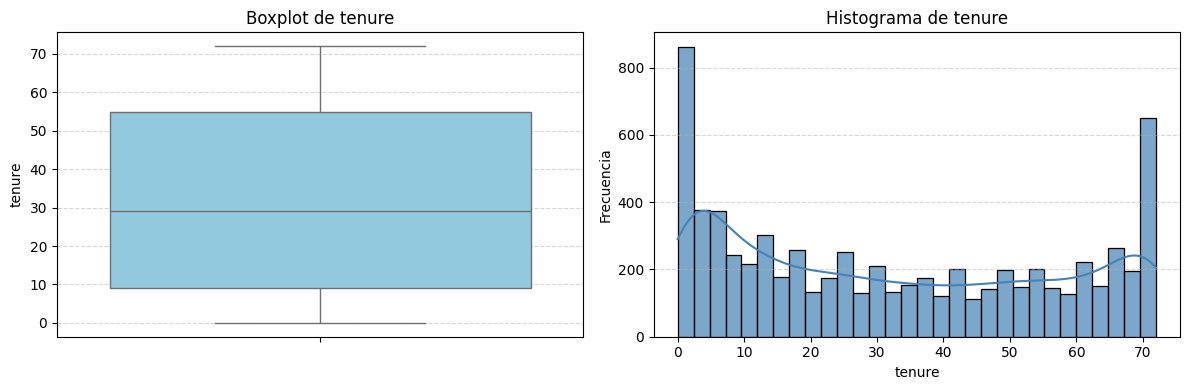

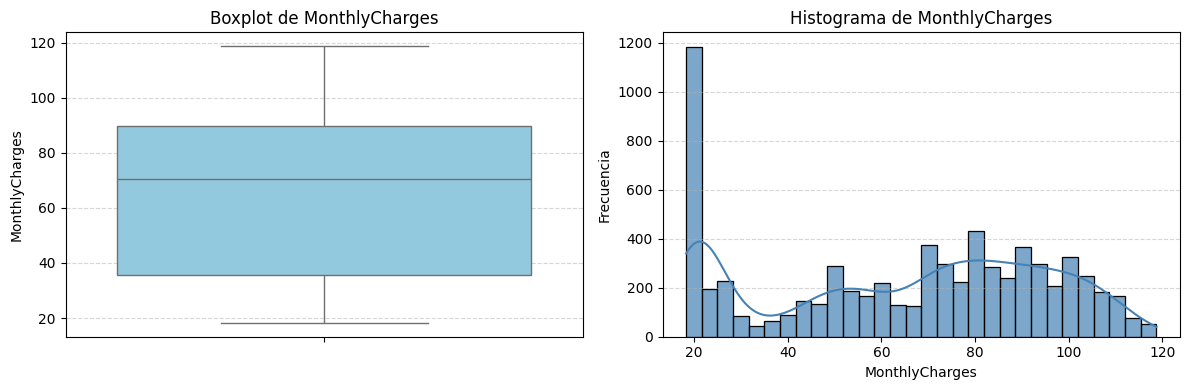

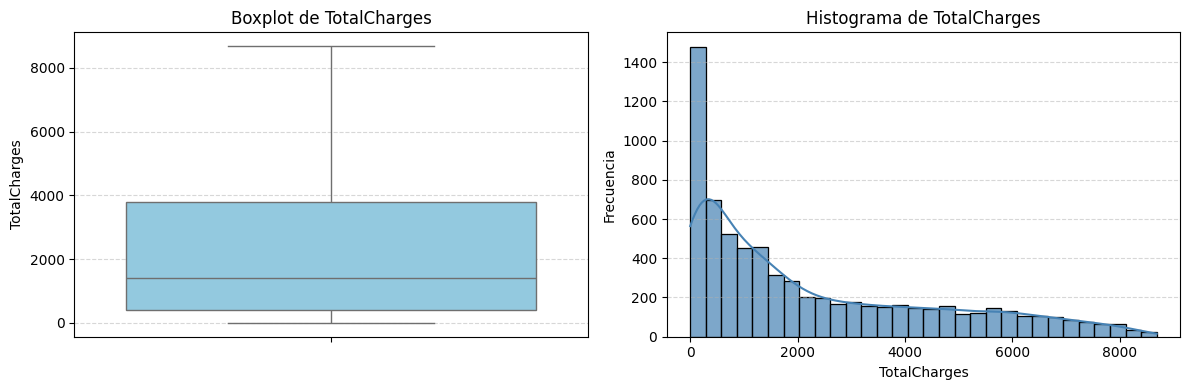

In [91]:
def box_hist(df, col,
                  bins: int = 30, kde: bool = True, color_box: str = 'skyblue', color_hist: str = 'steelblue'):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Boxplot
    sns.boxplot(y=df[col], ax=axes[0], color=color_box)
    axes[0].set_title(f'Boxplot de {col}', fontsize=12)
    axes[0].set_xlabel('')
    axes[0].grid(axis='y', linestyle='--', alpha=0.5)

    # Histograma
    sns.histplot(df[col], bins=bins, kde=kde, ax=axes[1],
                 color=color_hist, alpha=0.7)
    axes[1].set_title(f'Histograma de {col}', fontsize=12)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frecuencia')
    axes[1].grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

box_hist(df, 'tenure')
box_hist(df, 'MonthlyCharges')
box_hist(df, 'TotalCharges')

<div style="color:#fdd017;">

Aparentemente no hay valores fuera de lo que se puede considerar natural. Visualmente no se aprecian **_outliers_**. <br>
Sin embargo, aunque no parece necesario eliminar registros, quizás convendría transformar estos valores escalándolos.<br>
Tenemos que tenerlo en cuenta una vez dividido el set de datos en Train y Test.<br>
De esta manera, minimizaremos las dificultades en trabajarlos que podrían encontrar algunos modelos.

</div>

<div style="color:#fdd017;">

## 2.3. Guardado de datos limpios

Guardamos los datos que hemos limpiado en un CSV para tenerlos disponibles desde otros archivos.

</div>

In [ ]:
#df.to_csv('..\\data\\processed\\churn_clean_v1.csv', index=False, encoding='utf-8')

df_clean = df

In [24]:
df_clean.head(3)

,is_female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1


<div style="color:#fdd017;">

---

## 2.4. Visualizaciones Básicas

</div>

<div style="color:#fdd017;">

#### 2.4.1. Variables numéricas

</div>

In [93]:
# Describe de las columnas numéricas
numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

display(df_clean[numericas].describe().T)

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


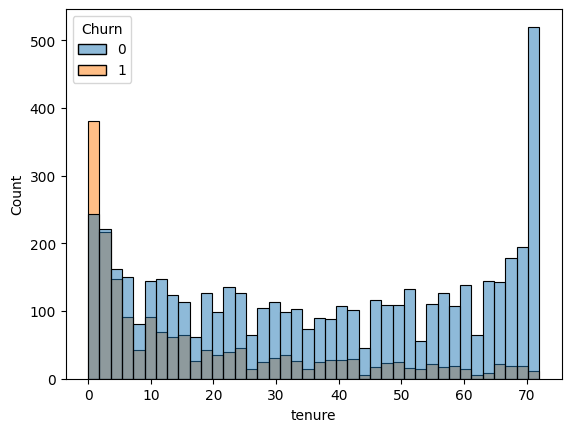

In [94]:
sns.histplot(
    data= df_clean,
    x ='tenure',
    hue = 'Churn',
    bins=40);

<div style="color:#fdd017;">

- Vemos que el mayor número de bajas se produce en el primer o primeros meses.
- Hay un considerable grupo de clientes que han permanecido en la empresa durante muchos meses (probablemente porque es cuando empezaron a guardar datos o empezó la actividad de la empresa).

</div>

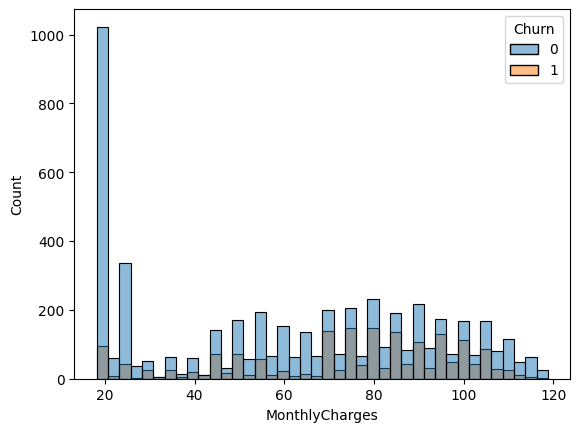

In [95]:
sns.histplot(
    data= df_clean,
    x ='MonthlyCharges',
    hue = 'Churn',
    bins=40);

<div style="color:#fdd017;">

- El monto mensual más frecuente está por debajo de los 20€.
- El resto de cargos mensuales tiene una distribución muy pareja.

</div>

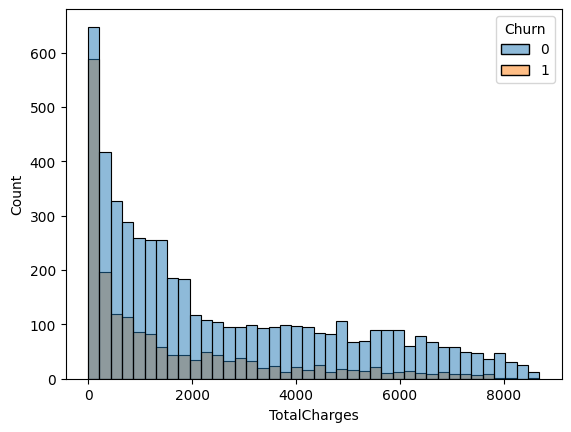

In [96]:
sns.histplot(
    data= df_clean,
    x ='TotalCharges',
    hue = 'Churn',
    bins=40);

<div style="color:#fdd017;">

- Podemos ver el mismo pico en valores muy bajos que vimos en 'MonthlyCharges'.
- Esta variable estará muy relacionada con 'tenure' y 'MonthlyCharges', puesto que se presupone una aproximación al producto de ambas variables, a excepción de que 'MonthlyCharges' puede ir cambiando a lo largo de los meses de permanencia del cliente ('tenure').

</div>

<div style="color:#fdd017;">

#### 2.4.2. Variables categóricas

Aunque hemos guardado las variables categóricas como _dummies_, para una visualización más clara utilizamos los datos originales, que nos permiten representar el peso de cada valor para estas variables.

</div>

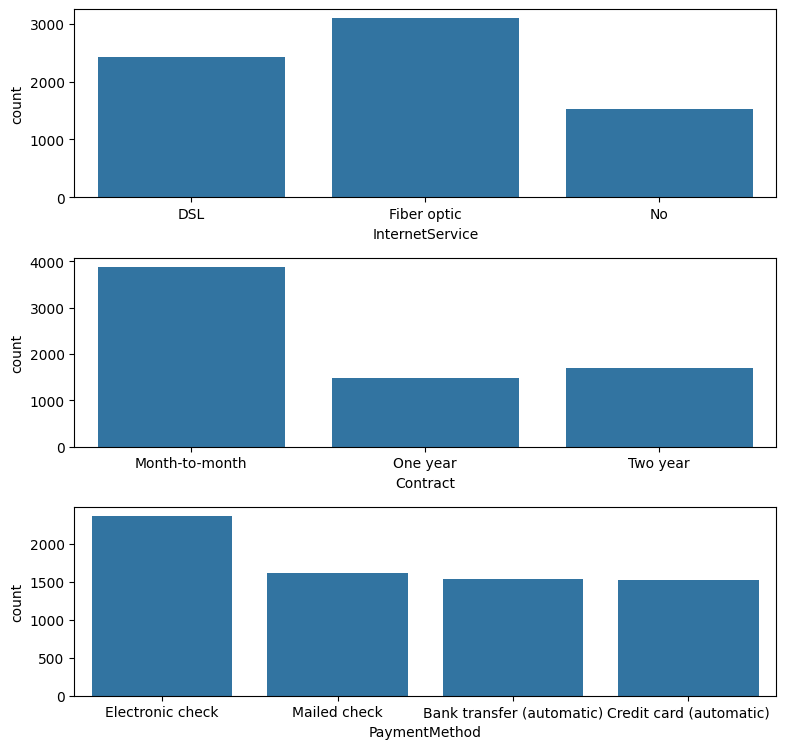

In [97]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

sns.countplot(
    data= df_raw,
    x ='InternetService',
    ax=axes[0]
);

sns.countplot(
    data= df_raw,
    x ='Contract',
    ax=axes[1]
);

sns.countplot(
    data= df_raw,
    x ='PaymentMethod',
    ax=axes[2]
);

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajustar el layout para que no se superpongan los títulos
plt.show()

In [98]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   is_female                              7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

<div style="color:#fdd017;">

#### 2.4.3. Matriz de correlaciones

</div>

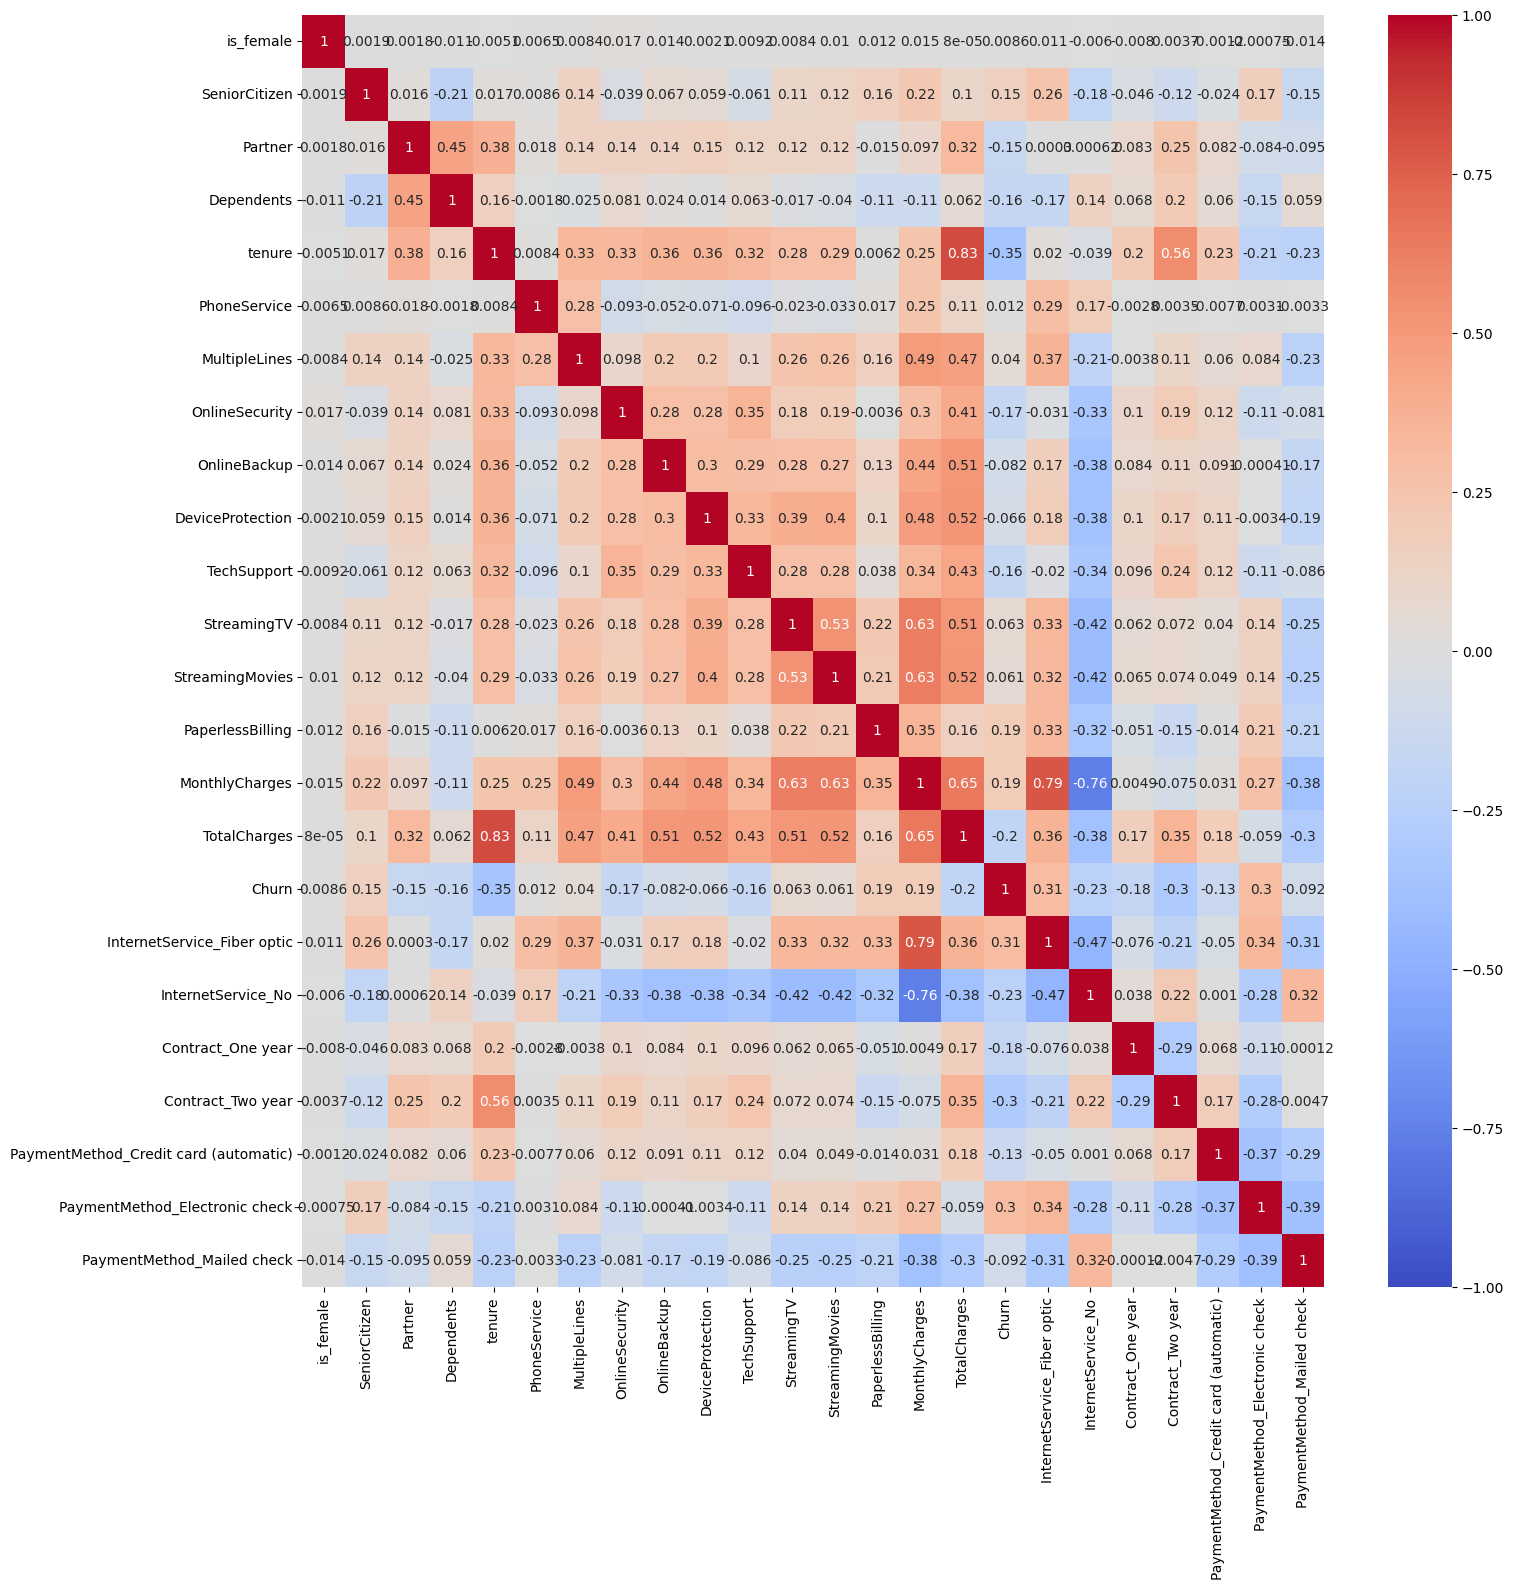

In [100]:
plt.figure(figsize=(16,16))
sns.heatmap(
    df_clean.corr(numeric_only=True),
    vmin=-1,
    cmap = 'coolwarm',
    annot = True,
);
plt.tight_layout()
plt.show()

<div style="color:#fdd017;">

**Lecturas de la Matriz de Correlaciones**

- Vemos correlaciones muy altas entre determinadas variables:<br>
    · 'MonthlyCharges' con las _dummies_ de 'InternetService'. Señal que el tipo de conexión a Internet (DSL, fibra o sin internet) determina en gran medida la factura mensual del cliente.<br>
    · 'TotalCharges' con 'tenure' con 0.83; algo que ya anticipábamos tal como hemos indicado previamente.

- Correlaciones con la baja de un cliente, nuestra target 'Churn':<br>
    · No hay ninguna variable que destaque con una alta correlación con el 'Churn'. Es decir, el abandono de los clientes parece que no se puede explicar con una única variable.<br>
    · El tipo de servicio de Internet contratado ('InternetService') tiene una correlación moderada con el 'Churn'. Parece que si el cliente tiene Servicio de Internet contratado tendrá mayor probabilidad de producir baja.<br>
    · Curiosamente, el método de pago ('PaymentMethod') también tiene una correlación moderada con el abandono del cliente.<br>
    · 'tenure' (con -0.35) y 'Contract' tienen una correlación negativa, lo que sugiere que los clientes antiguos o con contratos largos tienen un menor 'Churn'.<br>

**En resumen**: no hay ninguna variable que por sí sola explique el abandono de los clientes.


</div>